In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('iris.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.shape

(150, 5)

In [16]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
# plt.figure(figsize=(15,8))
# sns.distplot(df['Sepal.Width'],color = 'blue', label = 'Sepal Width')

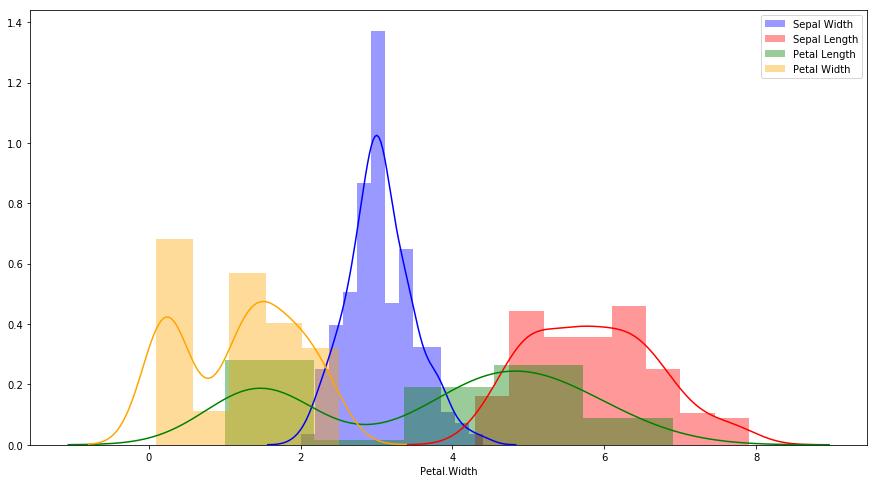

In [18]:
plt.figure(figsize=(15,8))
sns.distplot(df['Sepal.Width'],color = 'blue', label = 'Sepal Width')
sns.distplot(df['Sepal.Length'],color = 'red', label = 'Sepal Length')
sns.distplot(df['Petal.Length'],color = 'green', label = 'Petal Length')
sns.distplot(df['Petal.Width'],color = 'orange', label = 'Petal Width')
plt.legend()
#plt.axis('off')
plt.xlabel = ''

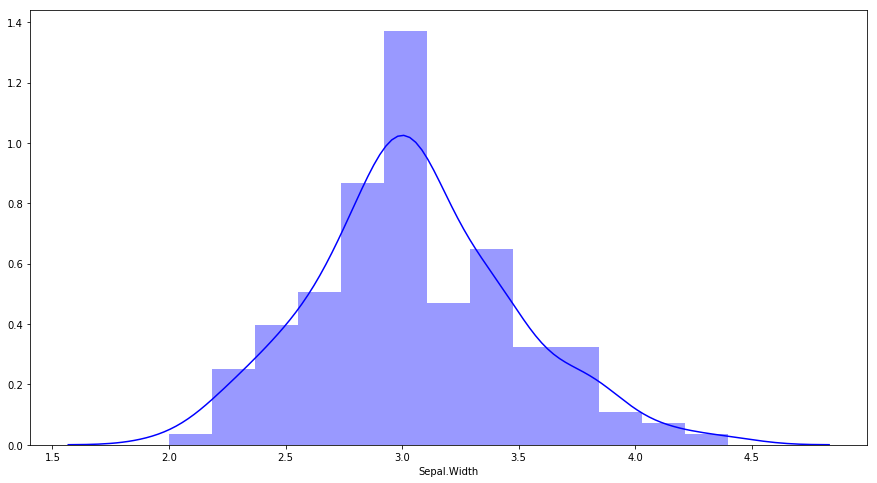

In [38]:
plt.figure(figsize=(15,8))
sns.distplot( df["Sepal.Width"] , color="blue")

In [19]:
# plt.figure(figsize=(15,8))
# f, axes = plt.subplots(2, 2, figsize=(15, 8), sharex=True)
# sns.distplot( df["Sepal.Width"] , color="blue", ax=axes[0, 0])
# sns.distplot( df["Sepal.Length"] , color="red", ax=axes[0, 1])
# sns.distplot( df["Petal.Length"] , color="green", ax=axes[1, 0])
# sns.distplot( df["Petal.Width"] , color="orange", ax=axes[1, 1])

## Measures of center

In [20]:
df.mode()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,iris
0,5.0,3.0,1.5,0.2,Iris-setosa
1,NaN,NaN,NaN,NaN,Iris-versicolor
2,NaN,NaN,NaN,NaN,Iris-virginica


In [21]:
df.median()

Sepal.Length    5.80
Sepal.Width     3.00
Petal.Length    4.35
Petal.Width     1.30
dtype: float64

In [22]:
df.mean()

Sepal.Length    5.843333
Sepal.Width     3.054000
Petal.Length    3.758667
Petal.Width     1.198667
dtype: float64

## Measures of spread

In [23]:
df.quantile([.25,.50,.75,1])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


In [24]:
# Maximum and minimum values
df['Sepal.Length'].min(),df['Sepal.Length'].max()

(4.3, 7.9)

In [25]:
# Range
df['Sepal.Length'].max() - df['Sepal.Length'].min(),np.ptp(df['Sepal.Length'])

(3.6000000000000005, 3.6000000000000005)

In [26]:
# inter quartile range
from scipy.stats import iqr

df['Sepal.Length'].quantile(.75) - df['Sepal.Length'].quantile(.25),iqr(df['Sepal.Length'])

(1.3000000000000007, 1.3000000000000007)

### Variance and standard deviation

**Deviation** is the difference between each value and the mean of the distribution.      
**Variance** is calculated by taking deviations for each value, squaring them and then diving by number of observations.     
**Standard deviation** is the square root of variance.          
Basically, standard deviation measure the spread or how far are the points from the mean. A large or a smaller value of sd is not necessarily good or bad, but depends on context e.g. if a machine packs 2 kg in a box and we find that the sd or variance is high, this basically means that there is a large variation in the amounts getting packed. 

It has the same units as the data and is affected by outliers. 

In [27]:
# Variance
df.var()

Sepal.Length    0.685694
Sepal.Width     0.188004
Petal.Length    3.113179
Petal.Width     0.582414
dtype: float64

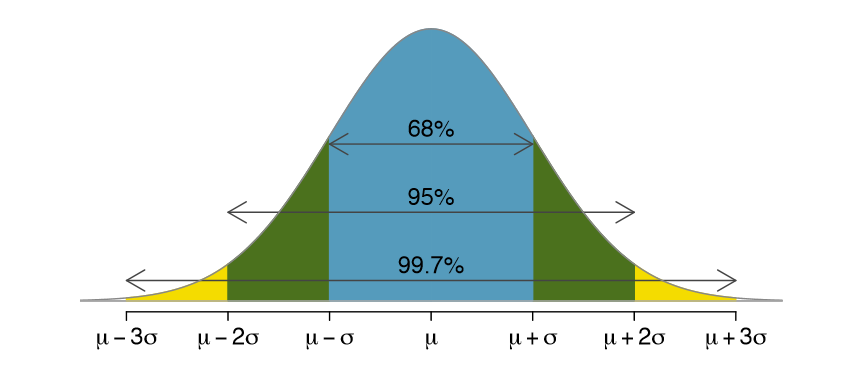

In [28]:
# Standard deviation
df.std()

Sepal.Length    0.828066
Sepal.Width     0.433594
Petal.Length    1.764420
Petal.Width     0.763161
dtype: float64

In [29]:
np.sqrt(df['Sepal.Length'].var())

0.8280661279778629

### Kurtosis

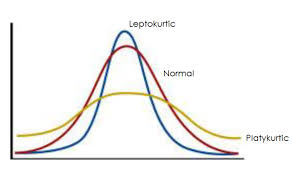

Kurtosis measures the **peakedness** of the distribution or to define it in a better way, its a measure of tail-heaviness of the distribution.

If kurtosis = 0, then its called **mesokurtic** distribution or we can say that it follows normal distribution.      
If kurtosis < 0, then its called **platykurtic** distribution or it has lighter tails as compared to normal distribution. The probability of extreme events(think "outliers") is lower.            
If kurtosis > 0, then its called **leptokurtic** distribution or it has heavier tails as compared to normal distribution. The probability of extreme events(think "outliers") is higher.         

In [30]:
# Kurtosis
# returns unbiased kurtosis using F's definition of kurtosis(kurtosis of normal distribution = 0)
df.kurt()

Sepal.Length   -0.552064
Sepal.Width     0.290781
Petal.Length   -1.401921
Petal.Width    -1.339754
dtype: float64

### Skewness

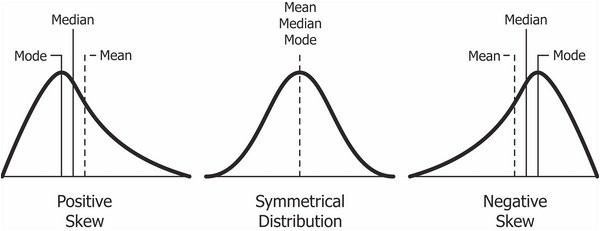

Skewness represents the distribution shape, basically gives an idea about the tails or symmetry of the distribution. A perfectly symmetrical distribution has a skewness of 0. A normal distribution is one such example.

With positive skewness, the right tail is longer than the left tail while with negative skewness, the left tail is longer than the right tail.

For positively skewed distributions, mode < median < mean.       
For negatively skewed distributions, mode > median > mean.      

**Rule of thumb**
if the skewness is between -0.5 to 0.5, the data is fairly symmetrical.       
if the skewness is between -1 and -0.5 or 0.5 and 1, its is said to be moderately skewed.       
if the skewness is less than -1 or greater than +1, it is considered highly skewed.       

In [31]:
# Skewness
df.skew()

Sepal.Length    0.314911
Sepal.Width     0.334053
Petal.Length   -0.274464
Petal.Width    -0.104997
dtype: float64

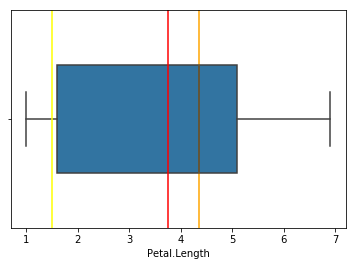

In [33]:
plt.figure(figsize = (6,4))
sns.boxplot(df['Petal.Length'],width = .5)
plt.axvline(df['Petal.Length'].mean(),color = 'red')
plt.axvline(df['Petal.Length'].mode()[0],color = 'yellow')
plt.axvline(df['Petal.Length'].mode()[0],color = 'yellow')
plt.axvline(df['Petal.Length'].median(),color = 'orange')

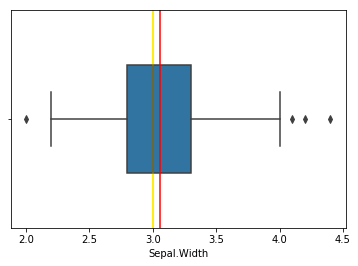

In [34]:
plt.figure(figsize = (6,4))
sns.boxplot(df['Sepal.Width'],width = 0.5)
plt.axvline(df['Sepal.Width'].mean(),color = 'red')
plt.axvline(df['Sepal.Width'].median(),color = 'orange')
plt.axvline(df['Sepal.Width'].mode()[0],color = 'yellow')

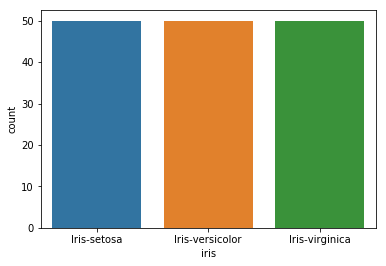

In [36]:
sns.countplot(df['iris'])